In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [5]:
df = df.select_dtypes(include=[np.number])
df.dropna(inplace=True)

X = df.values


In [6]:
class KMeansManual:
    def __init__(self, K=2, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        # randomly pick K points as initial centroids
        indices = np.random.choice(X.shape[0], self.K, replace=False)
        return X[indices]

    def closest_cluster(self, X, centroids):
        # compute distances between each point and centroid
        distances = np.sqrt(((X[:, np.newaxis] - centroids)**2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        centroids = []
        for k in range(self.K):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                centroids.append(cluster_points.mean(axis=0))
            else:
                centroids.append(X[np.random.choice(X.shape[0])])  # reassign randomly
        return np.array(centroids)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self.closest_cluster(X, self.centroids)
            new_centroids = self.update_centroids(X, labels)

            # stop if converged
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        self.labels = labels
        return labels


In [7]:
kmeans = KMeansManual(K=2, max_iters=200)
labels = kmeans.fit(X)

print("Cluster labels:", labels[:10])


Cluster labels: [0 0 0 1 0 1 0 1 1 1]


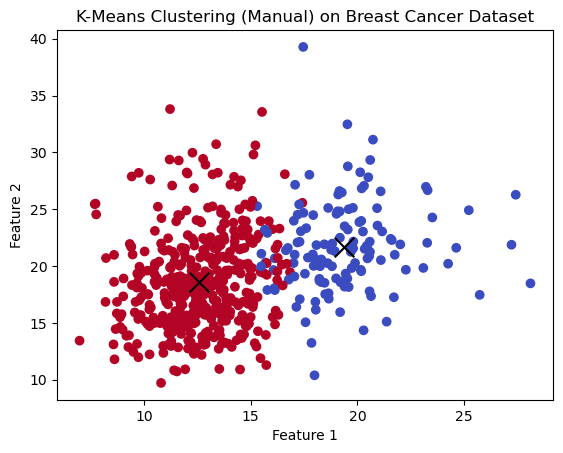

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            color='black', marker='x', s=200)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering (Manual) on Breast Cancer Dataset")
plt.show()
